In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [225]:
data = pd.read_csv('data.csv')
column_name = "RF_LeThuy"

##### Không thể thay đổi trực tiếp DataFrame nên cần copy

In [226]:
X = data[column_name].copy()

##### Thay thế những giá trị 'x' bằng trị phổ biến nhất

In [227]:
mode_value = X.mode()[0]
X[X == 'x'] = mode_value

##### Chuyển đổi thành kiểu float

In [228]:
X = X.astype(float)

In [229]:
wcss = []

# Thử nghiệm với một loạt số lượng cụm
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X.values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

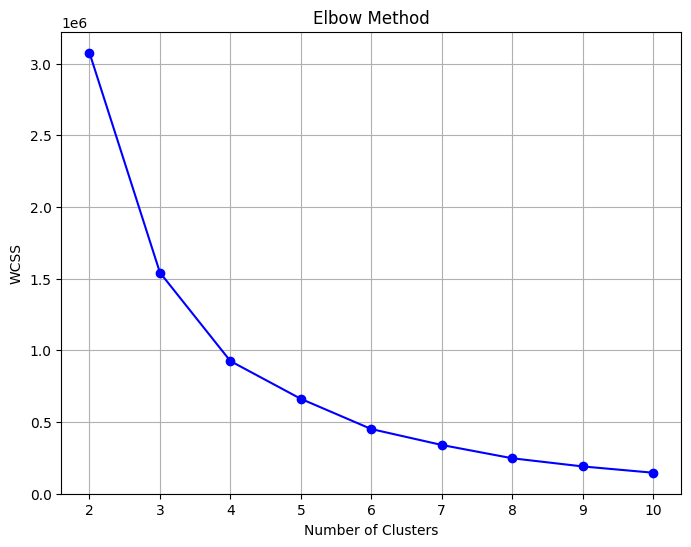

In [230]:
# Vẽ biểu đồ Elbow để xác định số lượng cụm phù hợp
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [231]:
k = 3
kmeans = KMeans(n_clusters=k)
X = X.values.reshape(-1, 1)
kmeans.fit(X)
labels = kmeans.labels_

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [232]:
for i in range(k):
  print(f"Cluster {i}: {len(labels[labels == i])} data points")

Cluster 0: 15284 data points
Cluster 1: 689 data points
Cluster 2: 98 data points


In [233]:
clustered_data = pd.DataFrame({'Label': labels, 'Value': X.reshape(-1)})

merged_data = data.copy()
merged_data['Label'] = clustered_data['Label']

In [234]:
clusters = merged_data['Label'].unique()

for cluster in clusters:
    print(cluster)
    cluster_data = merged_data[merged_data['Label'] == cluster]
    cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
    month_counts = cluster_data['Date'].dt.month.value_counts()
    print(month_counts)

0
Date
3     1358
1     1356
7     1336
5     1322
12    1316
8     1305
4     1296
6     1281
2     1237
9     1176
11    1176
10    1125
Name: count, dtype: int64
2
Date
10    41
9     23
11    21
8      7
7      3
5      2
6      1
Name: count, dtype: int64
1
Date
10    198
11    123
9     121
8      52
12     48
5      40
6      38
7      25
4      24
1       8
2       6
3       6
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_16316\351415395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
C:\Users\Admin\AppData\Local\Temp\ipykernel_16316\351415395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])  # Convert the Date column to datetime
C:\Users\Admin\AppData\Local\Temp\ipykernel_16316\351415395.py:6: SettingWithCopyWarning: 

In [235]:
# Tìm giá trị min và max cho từng cụm
min_max_values = clustered_data.groupby('Label')['Value'].agg(['min', 'max'])

# # In ra giá trị min và max cho từng cụm
for cluster_label, min_max in min_max_values.iterrows():
    print(f"Cluster {cluster_label}:")
    print(f"Min Value: {min_max['min']}")
    print(f"Max Value: {min_max['max']}")

Cluster 0:
Min Value: 0.0
Max Value: 31.5
Cluster 1:
Min Value: 31.6
Max Value: 140.5
Cluster 2:
Min Value: 142.2
Max Value: 686.6


In [236]:
month = pd.to_datetime(data['Date']).dt.month.values.reshape(-1, 1)
df = pd.DataFrame({'Rainfall': X.flatten(), 'Month': month.flatten()})
df

,Rainfall,Month
0,0.0,1
1,1.5,1
2,1.4,1
3,4.6,1
4,0.3,1
...,...,...
16066,0.0,12
16067,0.0,12
16068,0.0,12
16069,0.4,12


##### Chia tập dữ liệu thành 2 cụm 
> Cụm 1: 12 - 8 (Mưa ít)
> Cụm 2: 9 - 11 (Mưa nhiều)

In [237]:
dt1 = df[df['Month'].between(12, 12) | df['Month'].between(1, 8)]
dt2 = df[df['Month'].between(9, 11)]

dt2 = dt2.iloc[:, 0]

d = pd.DataFrame({'Rainfall': dt2})
n_days = 12
for i in range(n_days):
    d[f'Day-{i}'] = d['Rainfall'].shift(-i)
d = d.dropna()
d = d.drop(columns=['Day-0'])
d

,Rainfall,Day-1,Day-2,Day-3,Day-4,Day-5,Day-6,Day-7,Day-8,Day-9,Day-10,Day-11
243,0.2,1.6,1.3,211.8,228.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
244,1.6,1.3,211.8,228.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
245,1.3,211.8,228.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
246,211.8,228.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0
247,228.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16024,148.2,3.4,2.2,0.0,0.0,0.0,0.0,0.0,8.8,5.4,0.4,9.4
16025,3.4,2.2,0.0,0.0,0.0,0.0,0.0,8.8,5.4,0.4,9.4,0.0
16026,2.2,0.0,0.0,0.0,0.0,0.0,8.8,5.4,0.4,9.4,0.0,16.2
16027,0.0,0.0,0.0,0.0,0.0,8.8,5.4,0.4,9.4,0.0,16.2,12.8


In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_first = d.drop('Rainfall', axis=1).astype(float)
y_first = d['Rainfall'].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, train_size=0.4)



In [239]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

13461     1.1
4711      0.0
3976      1.0
7197      0.0
13104    88.5
         ... 
4307     14.0
9810     48.5
1424      0.0
12312     0.0
3956      3.0
Name: Rainfall, Length: 2396, dtype: float64


array([15.54369842, 10.4499494 ,  8.9195159 , ...,  9.71249792,
        9.15604495, 11.45998576])

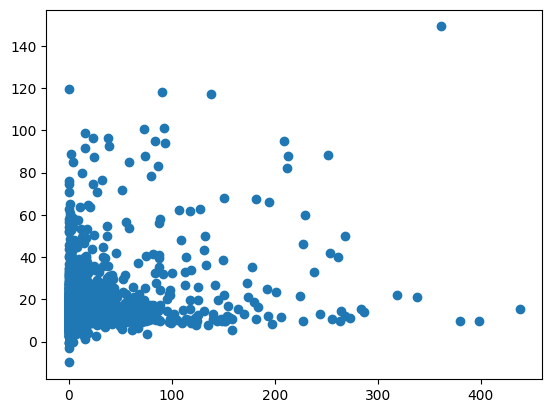

In [240]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
print(y_test)
y_pred

In [241]:
from sklearn.metrics import mean_squared_error, r2_score

# Đánh giá mô hình sử dụng MSE và R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.9f}")
print(f"R-squared (R²): {r2:.9f}")

Mean Squared Error (MSE): 1436.294706447
R-squared (R²): 0.091073132
